In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np

In [2]:
#Load predefined data 
iris = datasets.load_iris()

In [3]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [4]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [5]:
#KMeans for grouping of data with cluster value 3 as 3 colors are to taken in the graph
model = KMeans(n_clusters = 3)
#For making the data fit
model.fit(x)

KMeans(n_clusters=3)

In [6]:
#Calculating the accuracy of KMeans
score1 = sm.accuracy_score(y, model.labels_)
print('Accuracy of k-means = ',score1)

Accuracy of k-means =  0.8933333333333333


In [7]:
#Plotting the graph
plt.figure(figsize = (7,7))
colormap = np.array(['red','lime','black'])

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'K Mean Classification')

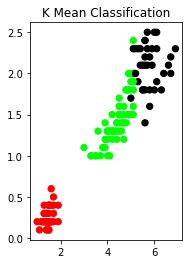

In [8]:
#Plot multilple graph
plt.subplot(1,2,1)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[model.labels_], s = 40)
plt.title('K Mean Classification')

In [9]:
#Used to get mean value from graph
scaler = preprocessing.StandardScaler()
scaler.fit(x)
#x after capturing the mean value
xsa = scaler.transform(x)
xs = pd.DataFrame(xsa, columns = x.columns)

In [10]:
#gmm is Gaussian Mixture Model
gmm = GaussianMixture(n_components = 3)
gmm.fit(xs)
y_cluster_gmm = gmm.predict(xs)

In [11]:
#Calcuting accuracy of EM
score2 = sm.accuracy_score(y, y_cluster_gmm)
print('Accuracy of EM = ',score2)

Accuracy of EM =  0.3333333333333333


Text(0.5, 1.0, 'EM Classification')

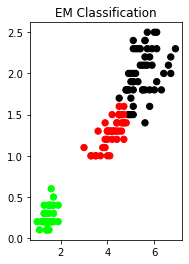

In [12]:
plt.subplot(1,2,2)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[y_cluster_gmm], s = 40)
plt.title('EM Classification')